In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
df = pd.read_csv("heart_attack.csv")
df.head()

,heart_disease,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [2]:
x = df['thalach'].values.reshape(-1, 1)
y = df['heart_disease'].values

x_train, x_test, y_train, y_test = train_test_split (x
                                                     , y
                                                     , test_size = 0.2
                                                     , random_state=42)

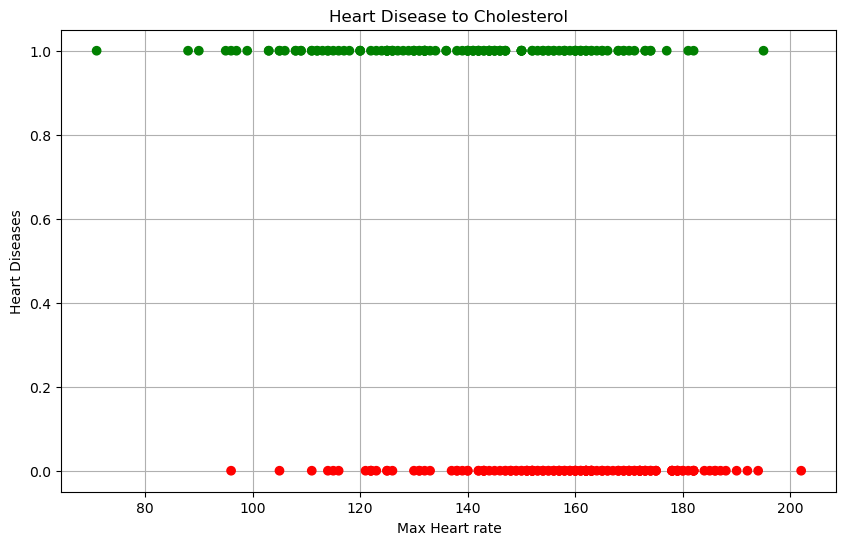

In [3]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
probs = classifier.predict_proba(x_test) [:,1]
plt.figure(figsize=(10,6))
colors = ['red' if i == 0 else 'green' for i in y]

plt.scatter(x,y, color=colors, zorder=20)
#plt.plot(sorted_x_test, sorted_probs, color='blue', lw=3)

plt.xlabel('Max Heart rate')
plt.ylabel('Heart Diseases')

plt.title('Heart Disease to Cholesterol')
plt.grid(True)
plt.show()

In [4]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [5]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  6],
       [ 9, 15]], dtype=int64)

In [6]:
beta_0 = classifier.intercept_[0]
beta_1 = classifier.coef_[0][0]

print(f"Model Equation: P(y=1) = 1 / (1 + e^(-({beta_0:.4f} + {beta_1:.4f} * x)))")

Model Equation: P(y=1) = 1 / (1 + e^(-(5.9611 + -0.0407 * x)))
